In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import matplotlib.animation as animation

import h5py
import numpy as np
from orthonet import muller

from sklearn import decomposition as decomp

<IPython.core.display.Javascript object>


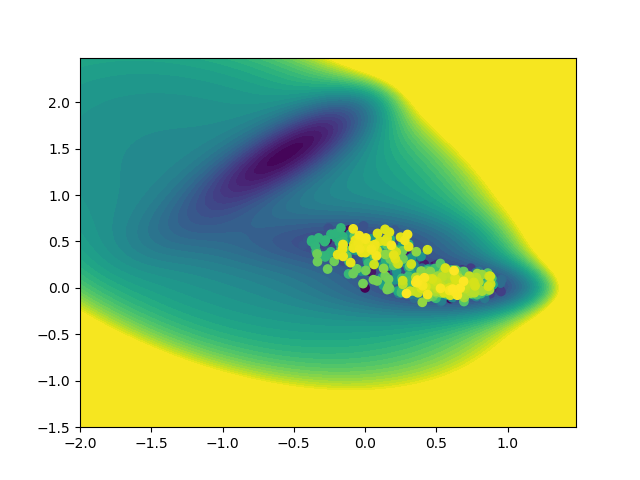

In [5]:
mf = muller.MullerForce()

test_traj = mf.sample_trajectory(10000, beta=9e-5, D=1e-3)

plt.figure()
ax = plt.gca()
mf.plot(ax=ax)
ax.scatter(test_traj[::10,0], test_traj[::10,1], c=np.arange(test_traj.shape[0] / 10))
plt.show()

In [ ]:
### parameters -----------------------------

n_trajectories = 256
traj_length    = 10000
time_stride    = 10
n_x, n_y       = 64, 64

time_points = np.arange(time_stride, traj_length, time_stride)
n_time_points = len(time_points)
x_bins = np.linspace(-1.5, 1.5, n_x+1)
y_bins = np.linspace(-0.5, 2.5, n_y+1)

# -------------------------------------------

print("%d trajectories // %d time points" % (n_trajectories, n_time_points))

rhos = np.zeros([n_time_points, n_x, n_y])

for t in range(n_trajectories):
    
    print('TRAJ %d / %d' % (t+1, n_trajectories))
    traj = mf.sample_trajectory(traj_length, beta=9e-5, D=1e-3)
    
    for i,tp in enumerate(time_points):
        # may be expensive
        h, _ = np.histogramdd(traj[tp][None,:], bins=[x_bins, y_bins])
        rhos[i] += h

256 trajectories // 999 time points
TRAJ 1 / 256
TRAJ 2 / 256
TRAJ 3 / 256
TRAJ 4 / 256
TRAJ 5 / 256
TRAJ 6 / 256
TRAJ 7 / 256
TRAJ 8 / 256
TRAJ 9 / 256
TRAJ 10 / 256
TRAJ 11 / 256
TRAJ 12 / 256
TRAJ 13 / 256
TRAJ 14 / 256
TRAJ 15 / 256
TRAJ 16 / 256
TRAJ 17 / 256
TRAJ 18 / 256
TRAJ 19 / 256
TRAJ 20 / 256
TRAJ 21 / 256
TRAJ 22 / 256
TRAJ 23 / 256
TRAJ 24 / 256
TRAJ 25 / 256
TRAJ 26 / 256
TRAJ 27 / 256
TRAJ 28 / 256
TRAJ 29 / 256
TRAJ 30 / 256
TRAJ 31 / 256
TRAJ 32 / 256
TRAJ 33 / 256
TRAJ 34 / 256
TRAJ 35 / 256
TRAJ 36 / 256
TRAJ 37 / 256
TRAJ 38 / 256
TRAJ 39 / 256
TRAJ 40 / 256
TRAJ 41 / 256
TRAJ 42 / 256
TRAJ 43 / 256
TRAJ 44 / 256
TRAJ 45 / 256
TRAJ 46 / 256
TRAJ 47 / 256
TRAJ 48 / 256
TRAJ 49 / 256
TRAJ 50 / 256
TRAJ 51 / 256
TRAJ 52 / 256
TRAJ 53 / 256
TRAJ 54 / 256
TRAJ 55 / 256
TRAJ 56 / 256
TRAJ 57 / 256
TRAJ 58 / 256
TRAJ 59 / 256
TRAJ 60 / 256
TRAJ 61 / 256
TRAJ 62 / 256
TRAJ 63 / 256
TRAJ 64 / 256
TRAJ 65 / 256
TRAJ 66 / 256
TRAJ 67 / 256
TRAJ 68 / 256
TRAJ 69 / 256
TRAJ 70

In [ ]:
f = h5py.File('../toymodels/muller_density.h5', 'w')
f['rhos'] = rhos
f.close()

<IPython.core.display.Javascript object>


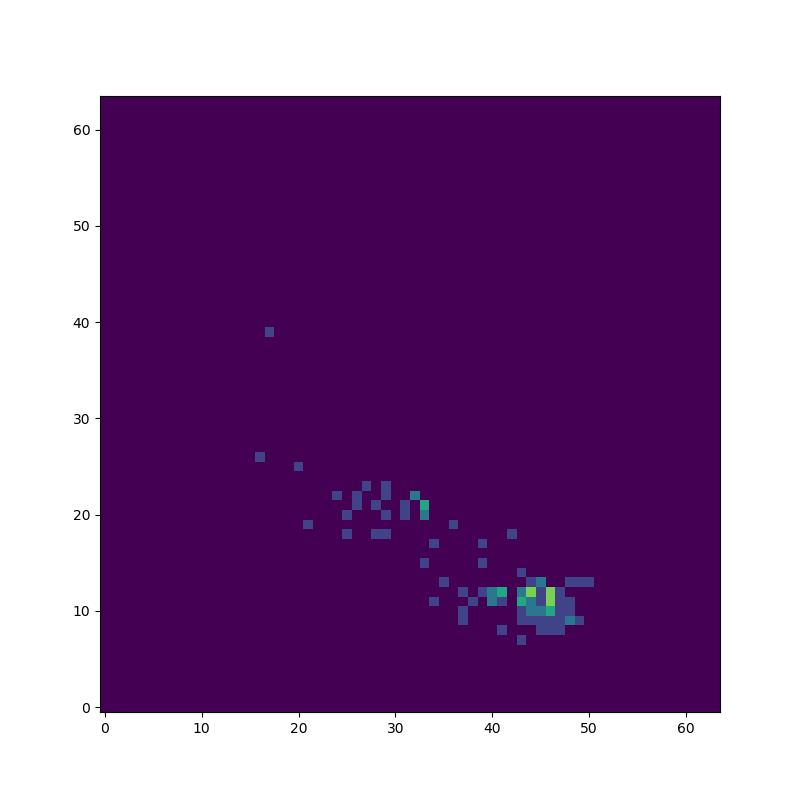

In [11]:
fps = 100

fig = plt.figure( figsize=(8,8) )
im = plt.imshow(rhos[0].T, interpolation='none', aspect='auto', vmin=0, vmax=5, origin='bottomleft')

def animate_func(i):
    print(i)
    im.set_array(rhos[i].T)
    return [im]

anim = animation.FuncAnimation(fig, 
                               animate_func, 
                               frames=n_time_points)

#anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
plt.show()

## try linear models, PCA & ICA

<IPython.core.display.Javascript object>


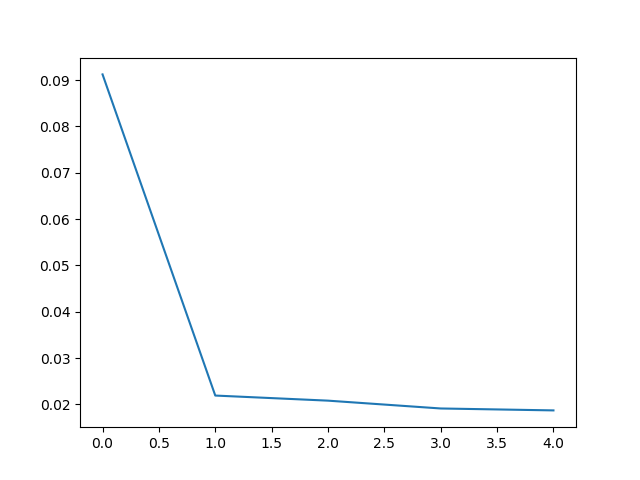

In [12]:
pca = decomp.PCA(n_components=5)
pca.fit(rhos.reshape(rhos.shape[0], -1))

plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

<IPython.core.display.Javascript object>


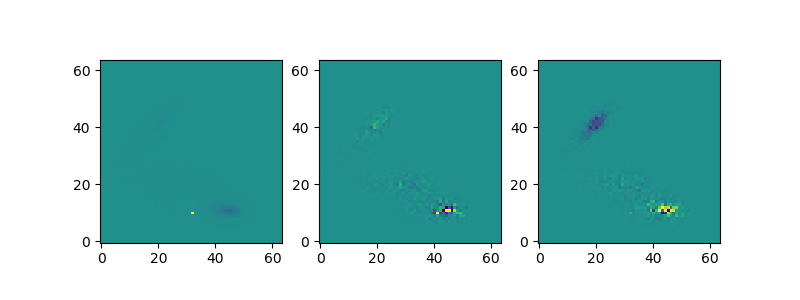

In [14]:
plt.figure(figsize=(8,3))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(pca.components_[i].reshape(n_x, n_y).T, origin='lowerleft', vmin=-.1, vmax=.1)
plt.show()

In [13]:
ica = decomp.FastICA(n_components=5)
ica.fit(rhos.reshape(rhos.shape[0], -1))
print(ica.mixing_.shape)

(4096, 5)


<IPython.core.display.Javascript object>


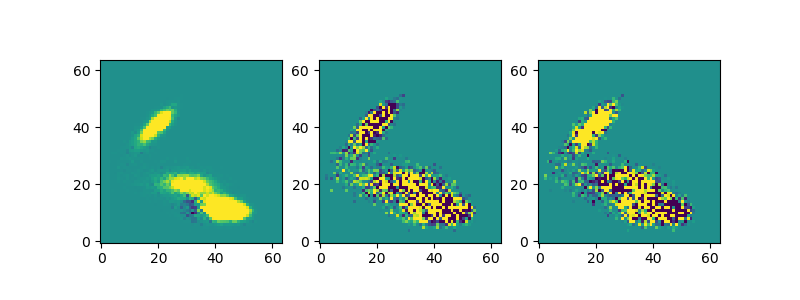

In [15]:
plt.figure(figsize=(8,3))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(ica.mixing_[:,i].reshape(n_x, n_y).T, origin='lowerleft', vmin=-.1, vmax=.1)
plt.show()